# Introduction to Probabilistic Graphical Models

## Practical Session 1

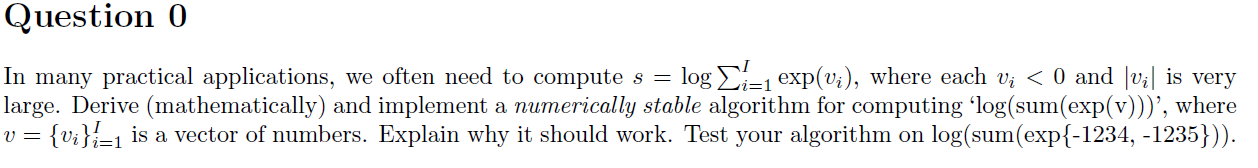

We know that $\displaystyle \log \sum_{i=1}^{I} \exp(v_i) = \log \sum_{i=1}^{I} \exp(v_i -v_{max} + v_{max})  $ where $ v_{max} $ is the maximum of the vector. (In this line, the trick is to add zero)

So $\displaystyle \log \sum_{i=1}^{I} \exp(v_i) = \log (\exp(v_{max}) \sum_{i=1}^{I} \exp(v_i -v_{max}) )= v_{max} + \log(\sum_{i=1}^{I} \exp(v_i -v_{max}))  $

It should work because $v_i - v_{max} > v_i $ . Indeed, $v_{max}$<0. So we will have higher value in the log function and we will not have an error ( -inf as output). 

If the paramater in the exponantial function is very small, the machine will round the result of this exponantial to zero and we will have log(0); it is impossible.

In [1]:
import numpy as np
def log_sum_exp(v):
    
    Vmax=np.max(v)
    
    return np.array(Vmax) + np.log( sum( np.exp( np.array(v) - np.array(Vmax) ) ) )

print( log_sum_exp([-1234,-1235]) )
    

-1233.6867383124818


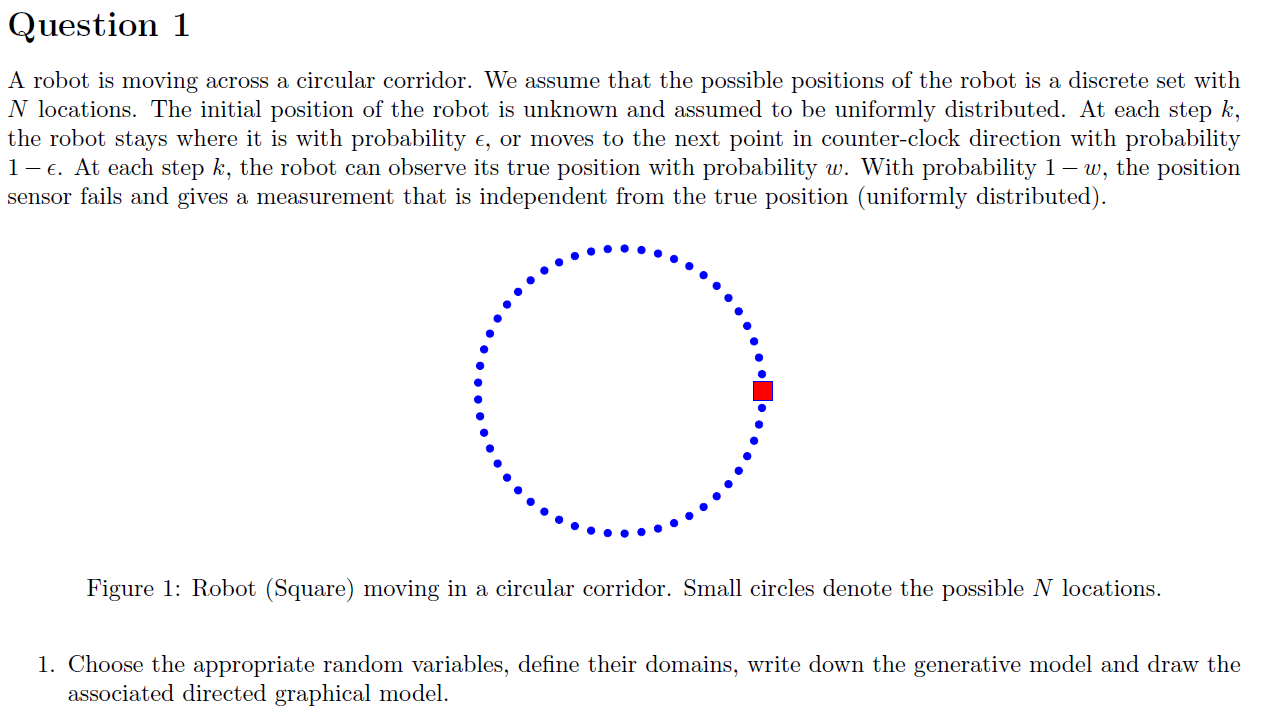


-$\textbf{First random variable}$ : 

Let's take $X$, a random variable which describes the event : " the robot stays in its current position".

$ \Omega : [1,N] \to [0,1] $


$X$ follows a Bernouilli distribution of parameter $ \varepsilon $, the probability that the robot stays in its current position.

$ P : \{0,1\} \to \{\epsilon, 1- \epsilon\}$

$P(X=x)=
\begin{cases}
\epsilon & \text{if}& x=1 & \text{the robot stays in its current position} \\
1- \epsilon & \text{if}& x=0 & \text{the robot moves to another position}
\end{cases}$  


-$ \textbf {Second random variable} $ :

Let's take $Y$, a random variable which describes the event : " the observation of the robot on its current position is true "

$ \Omega : [1,N] \to [0,1] $

$Y$ follows a Bernouilli distribution of parameter $ \omega $, the probability that the observation of the robot on its current position is true.

$ P : \{0,1\} \to \{\omega, 1- \omega\}$

$P(Y=y)=
\begin{cases}
\omega & \text{if}& y=1 & \text{the observation of the robot on its current position is true} \\
1- \omega & \text{if}& y=0 & \text{the observation of the robot on its current position is false}
\end{cases}$  


-$\textbf{Generative model}$ : 

In our case, we have a generative model because we want to predict the distribution of the robot's observation on its position at step k  knowing its previous positions $(x_0,x_1,x_2,...,x_{k-1})$ and its previous  observations $(y_1,y_2,...,y_{k-1})$

Thus, we will have the following Joint Distribution:

$P(Y_{1:K},X_{0:K})=P(X_0) \times (\prod_{i=1}^{K}P(Y_i | X_i) \times P(X_i|X_{i-1})$

$ \textbf {The associated directed graphical model} $ :

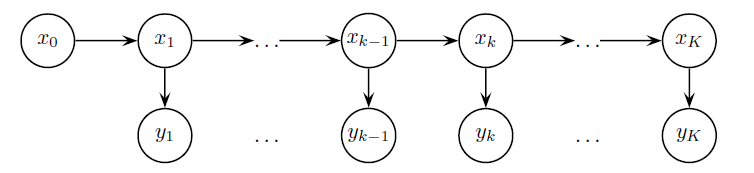

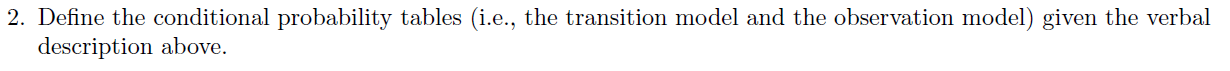

-$\textbf{Transition Model (a N by N matrix)}$ :


For the transition model, we will take a similar example with three positions.
The real one would have N position.

So we have this type of model :


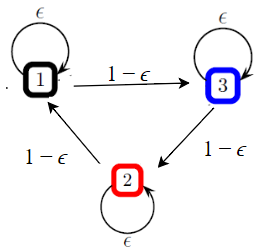

To represent the transition matrix, we will take a 3 by 3 matrix.

$(1- \epsilon) \times \left[
\begin{array}{ccc}
0 & 1 & 0 \\
0 & 0 & 1\\
1 & 0 & 0
\end{array}
\right] + \epsilon \times \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1
\end{array}
\right] $

The transition matrix will be a N by N matrix following this model.

So if $ \epsilon = 0.3$, we will have this N by N matrix :


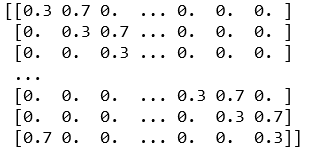

-$\textbf{Observation model}$ :

We know that, for the observation model :

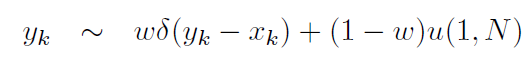

Thus, we will have this observation matrix :

$ \omega * I_{N}+ (1- \omega) * (\frac{1}{N},\frac{1}{N},...,\frac{1}{N}) $

where $(\frac{1}{N},\frac{1}{N},...,\frac{1}{N})$ is a vector of N elements





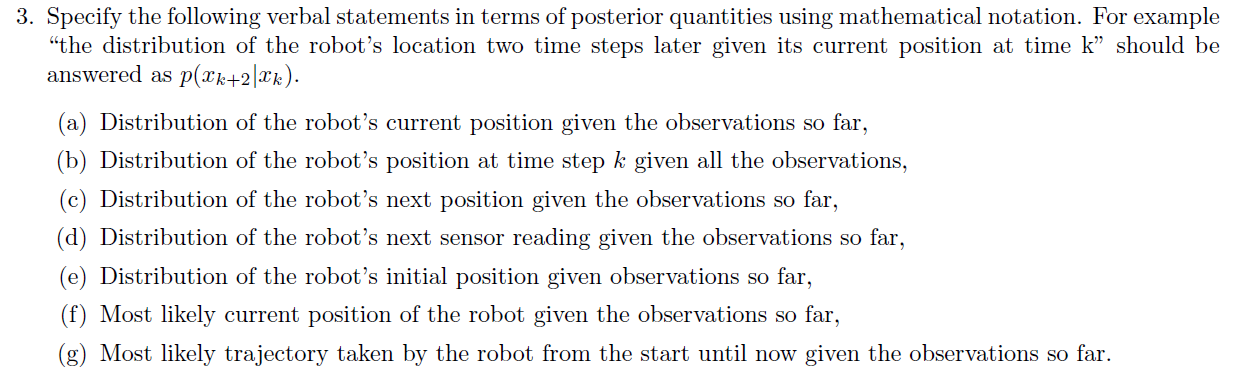

a) $p(x_k|y_{1:k})$

b) $p(x_k|y_{1:K})$

c) $p(x_{k+1}|y_{1:k})$

d)$p(y_{k+1}|y_{1:k})$

e)$p(x_0| y_{1:k})$

f)$argmax_{x_{0:k}}(p(x_k|y_{1:k}))$

g)$argmax_{x_{0:k}}(p(x_{0:k}|y_{1:k}))$

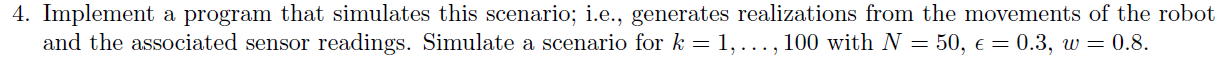

#### Setup a parameter structure

In [2]:
import numpy as np


#transition model
N=50
ep=0.3 #Probability of not-moving
E= np.identity(N)
A= ep*E + (1-ep)*np.roll(E,1,1) #Transition Matrix
#print(A)

#observation model

w=0.8 #Probability of observing true state
C= w*E + (1-w) * np.ones(N) / N  #Observation matrix
#print(C)

#prior p(x_1)
pri= np.ones(N)/N

# Create a parameter structure

hm = {"A": A, "C":C,"p_x1":pri}


#### Generate data from the true model

In [3]:
def generate_data(hm, K):
    
    state= np.zeros(K)
    obs = np.zeros(K)
    
    for k in range (K):
        
        if k == 0 :
            test=np.random.multinomial(n=1, pvals=hm["p_x1"])
            list_test=test.tolist()
            state[k]=list_test.index(1)
        
        else :
            test=np.random.multinomial(n=1, pvals=hm["A"][:,int(state[k-1])])
            list_test=test.tolist()
            state[k] =list_test.index(1)
            
        test=np.random.multinomial(n=1, pvals=hm["C"][:][int(state[k])])
        list_test=test.tolist()
        obs[k]=list_test.index(1)
    return obs,state
print(generate_data(hm,100)[0])
print(generate_data(hm,100)[1])

[ 5.  4.  3.  2.  2.  1.  0. 49. 48.  7. 36. 46. 45. 12. 44. 43. 42. 41.
 40. 39. 38. 37. 36. 36. 45. 35. 30. 40. 32. 31. 14. 29. 28. 27. 26. 25.
 36. 23. 22. 21. 21. 20. 19. 18. 48. 16. 27. 14. 13. 12. 11.  2.  9.  9.
  8.  8.  7.  6.  1.  4.  4.  3.  2.  1.  4. 30. 49. 42. 14. 46. 21. 45.
 45. 45. 45. 44. 43. 42.  8. 28. 13. 38. 38. 37. 36. 35. 34. 33. 32. 44.
 10. 29. 28. 21. 26. 31. 24.  0. 22. 21.]
[38. 37. 36. 35. 35. 34. 34. 33. 33. 33. 32. 31. 30. 30. 29. 28. 28. 27.
 27. 27. 26. 26. 25. 24. 24. 24. 24. 23. 23. 22. 22. 21. 20. 20. 19. 18.
 17. 16. 15. 14. 13. 13. 13. 12. 11. 11. 10.  9.  8.  7.  6.  5.  4.  3.
  2.  1.  0. 49. 48. 47. 46. 46. 46. 45. 45. 45. 44. 44. 43. 42. 42. 41.
 40. 40. 40. 40. 39. 39. 38. 37. 36. 36. 35. 35. 34. 33. 32. 31. 30. 29.
 28. 28. 27. 27. 27. 26. 25. 24. 23. 23.]


### Test and visualisation

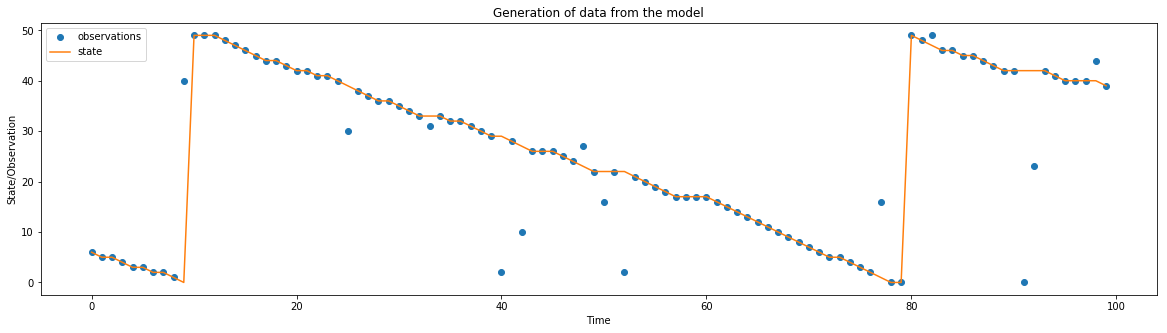

In [17]:
import matplotlib.pyplot as plt

obs,state= generate_data(hm,100)
plt.figure(figsize=(20,5))
plt.title("Generation of data from the model")
p1 = plt.plot(obs, 'o')
p2 = plt.plot(state)
plt.ylabel("State/Observation")
plt.xlabel("Time")
plt.legend((p1[0], p2[0]), ("observations","state"))
plt.show()


We can notice that the large part of the observations coincide to the state or the location of the robot.

Sometimes, the observations and the state are near of the abscissa axis and go up immediately. 

We can explain this fact because the robot is in the last position and go back to the first one.

When the observations are not counfounded with the state, the position sensor fails.It is not occur very often because the probability to fail is 1-$\omega$=0.2 which is small

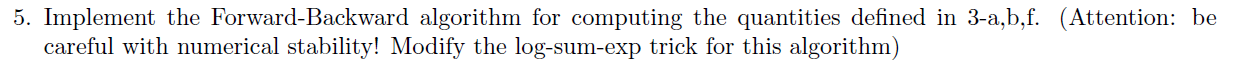

#### Inference:Predict

In [5]:
def state_predict(A, log_p):
    mx= np.max(log_p) #for the stable computation
    p= np.exp(log_p-mx)
    return np.log(np.dot(A,p)) + mx

#### Inference:Update

In [6]:
def state_update(obs, log_p):
    return np.log(obs[:]) + log_p

#### Inference:Postdict

In [7]:
def state_postdict(A,log_p):
    mx= np.max(log_p) #for the stable computation
    p=np.exp(log_p- mx)
    return np.log(np.dot(p,A)) + mx

#### Inference : Forward pass

In [8]:
K=100
log_alpha = np.zeros((N,K))
log_alpha_predict = np.zeros((N,K))

for k in range(K):
    
    if k==0:
        log_alpha_predict[:,k]= np.log(hm["p_x1"])
    
    else:
        log_alpha_predict[:,k] = state_predict(hm["A"],log_alpha[:,k-1])
    
    log_alpha[:,k]= state_update(hm["C"][int(obs[k])][:], log_alpha_predict[:,k])

#### Inference : Backward pass 

In [9]:
T=100
log_beta= np.zeros((N,T))
log_beta_postdict= np.zeros((N,T))

for t in range(T-1,-1,-1):
    
    if t == T-1:
        log_beta_postdict[:,t]= np.zeros(N)
    else:
        log_beta_postdict[:,t] = state_postdict(hm["A"],log_beta[:,t+1])
    
    log_beta[:,t] = state_update(hm["C"][int(obs[t])][:],log_beta_postdict[:,t])

#### Inference : Smoothing

In [10]:
log_gamma= log_alpha + log_beta_postdict
print(log_sum_exp(log_gamma))

[-169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.25914002 -169.25914002 -169.25914002 -169.25914002 -169.25914002
 -169.

#### Test and Visualisation

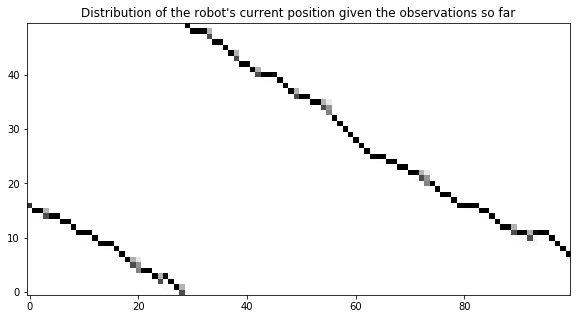

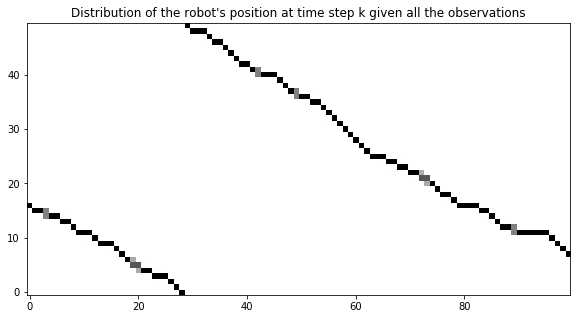

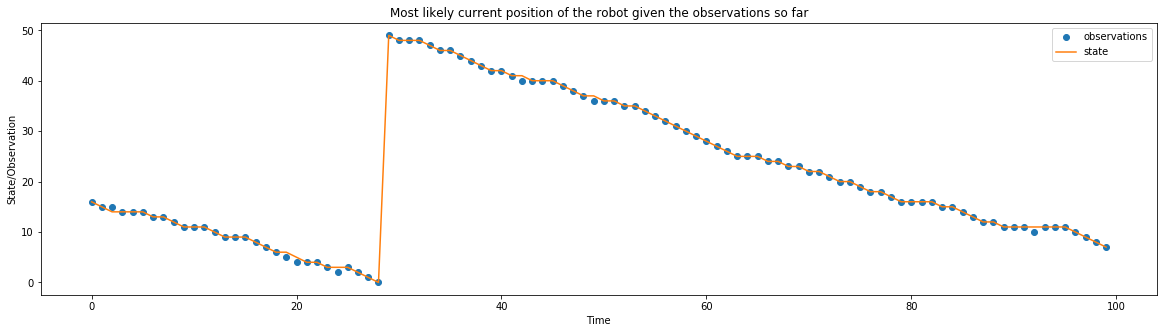

In [11]:
def normalize(A, axis=None):
    X = np.sum(A, axis=axis,keepdims=True)
    index = np.where(X == 0)
    X[index] = 1
    return A/X


def normalize_exp(log_P, axis=None):
    mx = np.max(log_P, keepdims=True, axis=axis)
    M = normalize(np.exp(log_P - mx), axis=axis)
    return M


alpha = normalize_exp(log_alpha, axis=0)
alpha_pred = normalize_exp(log_alpha_predict, axis=0)
gam = normalize_exp(log_gamma, axis=0)

plt.figure(figsize=(20,5))
plt.imshow(alpha, interpolation='nearest', cmap='gray_r')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Distribution of the robot\'s current position given the observations so far')
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(gam, interpolation='nearest', cmap='gray_r')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Distribution of the robot\'s position at time step k given all the observations')
plt.show()

plt.figure(figsize=(20,5))
plt.title("Most likely current position of the robot given the observations so far")
p1 = plt.plot(np.argmax(alpha,axis=0), 'o')
p2 = plt.plot(state)
plt.ylabel("State/Observation")
plt.xlabel("Time")
plt.legend((p1[0], p2[0]), ("observations","state"))

plt.show()

We can notice that for the graph of smoothing wich represent the Distribution of the robot's position at time step k given all the observations, we have better results than the graph of filtering because the curve is the smoothest. It is not a surprise because we have more observations in this case.

For the graph of filtering wich represents the Distribution of the robot's current position given the observations so far, the curve is less smooth but we have good results. Indeed, we have a smaller number of obsesrvations.

Finally, for the third graph which represent the Most likely current position of the robot given the observations so far, we have the best results.The observations are almost all confounded with the state.Indeed, in this case, we consider the argmax of the graph of filtering . So we will have best results and less error.


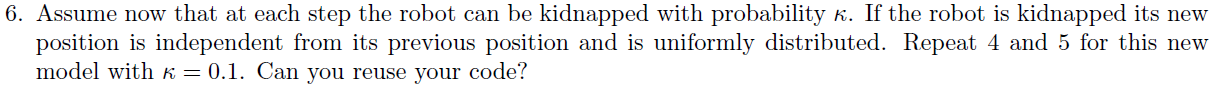

Yes, we can reuse the code.

We just have to modify the transition matrix (a matrix N by N).

We will add the probability to be kidnapped $\kappa$ to the formula :

$ A = (1- \kappa) \times ( (1- \epsilon) \times \left[
\begin{array}{ccc}
0 & 1 & 0 \\
0 & 0 & 1\\
1 & 0 & 0
\end{array}
\right] + \epsilon \times \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1
\end{array}
\right] ) + \left[
\begin{array}{ccc}
\frac{\kappa}{N} & \frac{\kappa}{N} & \frac{\kappa}{N} \\
\frac{\kappa}{N} & \frac{\kappa}{N} & \frac{\kappa}{N}\\
\frac{\kappa}{N} & \frac{\kappa}{N} & \frac{\kappa}{N}
\end{array}
\right]$

Indeed, the probability of not being kidnapped is 1-$\kappa$ so we multiply the transition matrix by ($1-\kappa$) and we add the N by N matrix in which all elements are equal to $\frac{\kappa}{N} $ because when the robot is kidnapped, its new position is randomly choose, independent from its previous position and uniformly distributed.

So the new transition matrix will follow the previous formula (but with N by N matrix)

If $ \kappa $ = 0.1 and $ \epsilon$ = 0.3, we will have this N by N matrix :

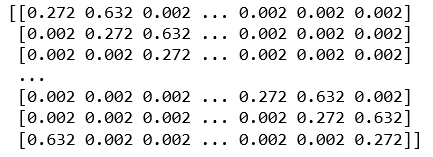


#### New Transition Matrix

In [12]:
kappa = 0.1
A2 = (1-kappa)*(ep*E + (1-ep)*np.roll(E,1,1)) + kappa*np.ones((N,N))/N #New Transition Matrix
hm2 = {"A": A2, "C":C,"p_x1":pri}


#### Implementation of the new model

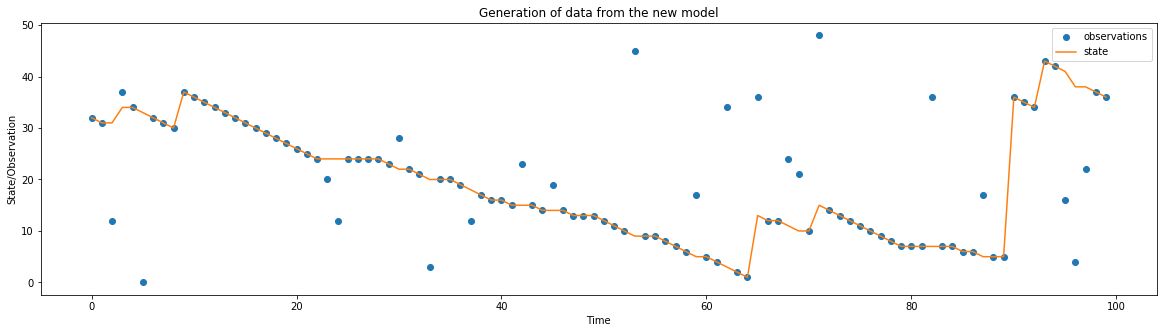

In [13]:
obs,state= generate_data(hm2,100)
plt.figure(figsize=(20,5))
plt.title("Generation of data from the new model")
p1 = plt.plot(obs, 'o')
p2 = plt.plot(state)
plt.ylabel("State/Observation")
plt.xlabel("Time")
plt.legend((p1[0], p2[0]), ("observations","state"))
plt.show()


We can notice that , for this new model, the large part of the observations coincide to the state or the location of the robot but we have more errors. It can be due to that the sensor fails more often but especially to the hapening of the robot kidnapping.

Sometimes, the observations and the state are near of the abscissa axis and go up immediately. 

We can explain this fact because the robot is in the last position and go back to the first one.

Sometimes, we have also this fact when the observations are not near of the abscissa axis. It is due to a kidnapping of the robot.

When the observations are not counfounded with the state, the position sensor fails or a kidnapping happens.It is not occur very often because the probability to fail is 1-$\omega$=0.2  and the probabilty to be kidnapped is $ \kappa=0.1$ which are both small

#### Forward Backward algorithm

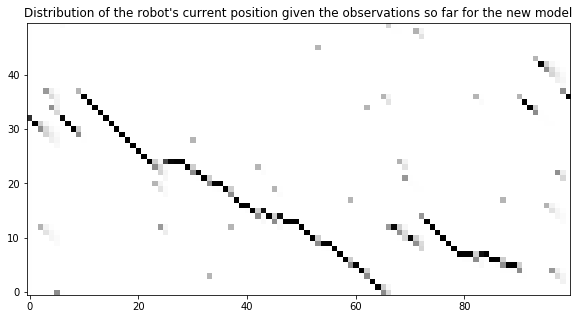

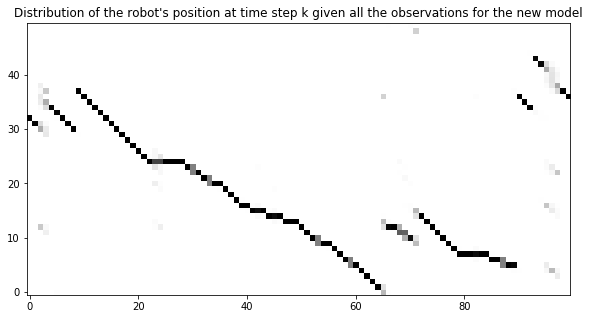

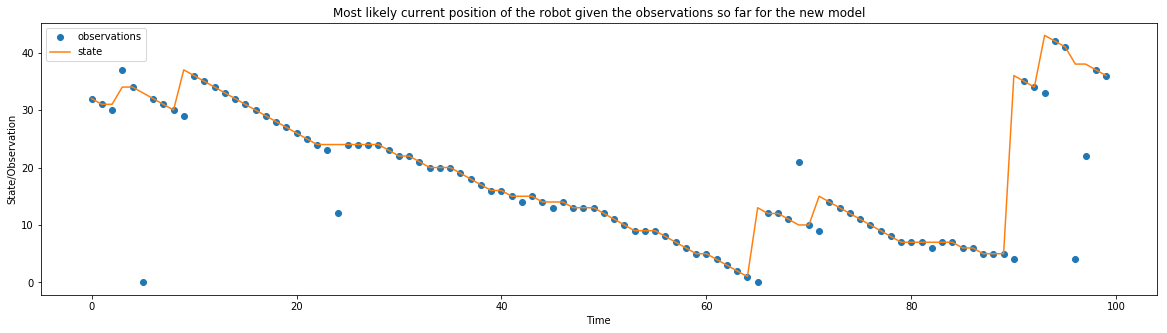

In [14]:
K=100
log_alpha = np.zeros((N,K))
log_alpha_predict = np.zeros((N,K))

for k in range(K):
    
    if k==0:
        log_alpha_predict[:,k]= np.log(hm2["p_x1"])
    
    else:
        log_alpha_predict[:,k] = state_predict(hm2["A"],log_alpha[:,k-1])
    
    log_alpha[:,k]= state_update(hm2["C"][int(obs[k])][:], log_alpha_predict[:,k])
    
    
T=100
log_beta= np.zeros((N,T))
log_beta_postdict= np.zeros((N,T))

for t in range(T-1,-1,-1):
    
    if t == T-1:
        log_beta_postdict[:,t]= np.zeros(N)
    else:
        log_beta_postdict[:,t] = state_postdict(hm2["A"],log_beta[:,t+1])
    
    log_beta[:,t] = state_update(hm2["C"][int(obs[t])][:],log_beta_postdict[:,t])
    
log_gamma= log_alpha + log_beta_postdict

alpha = normalize_exp(log_alpha, axis=0)
alpha_pred = normalize_exp(log_alpha_predict, axis=0)
gam = normalize_exp(log_gamma, axis=0)

plt.figure(figsize=(20,5))
plt.imshow(alpha, interpolation='nearest', cmap='gray_r')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Distribution of the robot\'s current position given the observations so far for the new model')
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(gam, interpolation='nearest', cmap='gray_r')
ax = plt.gca()
ax.invert_yaxis()
plt.title('Distribution of the robot\'s position at time step k given all the observations for the new model')
plt.show()

plt.figure(figsize=(20,5))
plt.title("Most likely current position of the robot given the observations so far for the new model")
p1 = plt.plot(np.argmax(alpha,axis=0), 'o')
p2 = plt.plot(state)
plt.ylabel("State/Observation")
plt.xlabel("Time")
plt.legend((p1[0], p2[0]), ("observations","state"))

plt.show()

For the new model, we have the same result as the previous model in terms of performance. The second one is better  than the first one because we have more observation

We can notice that we have some gaps in the two first curve. It is due to the kidnapping of the robot.

For the last one, we have more error than the case without kidnapping but it still the best. This increasing of error is due to the kidnapping of the robot.

However, we have less error than the basic generation because we take the argmax so it improves the results and we have less errors.